# CREDIT CARD ATTRITION RATE

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import numpy as np


In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
data = pd.read_csv('C:\\Users\\Yaswanth\\OneDrive\\Pictures\\Desktop\\yash\\credit_card_churn.csv')

In [18]:
data.shape

(10127, 23)

In [21]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [22]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [40]:
missing_values = data.isnull().sum()
print(missing_values)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [41]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

- 'int64' & 'float64' here shows the continuous variables
- 'object' here shows the categorical variables

#  UNIVARIATE ANALYSIS

In [24]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<Axes: ylabel='Frequency'>

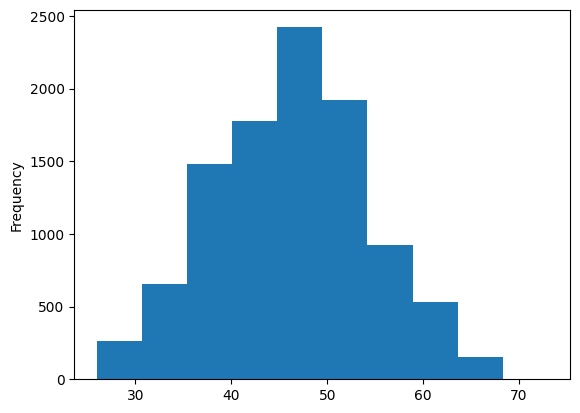

In [25]:
data['Customer_Age'].plot.hist()

- most of the customers lies between 45 - 50 years.

<Axes: xlabel='Attrition_Flag'>

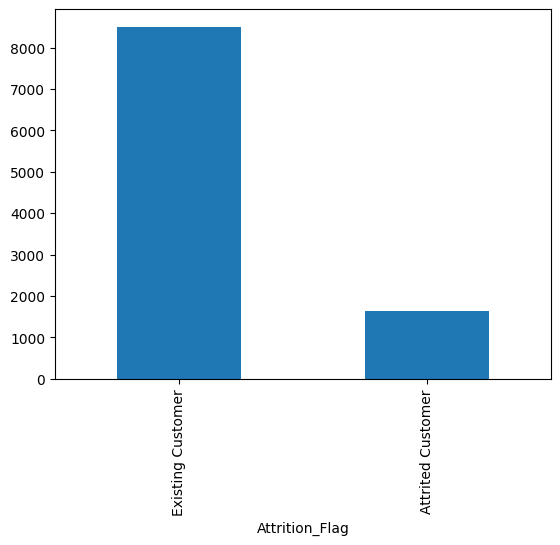

In [26]:
data['Attrition_Flag'].value_counts().plot.bar()

- maximum is the ratio of the Existing Customer in the dataset.

<Axes: xlabel='Education_Level'>

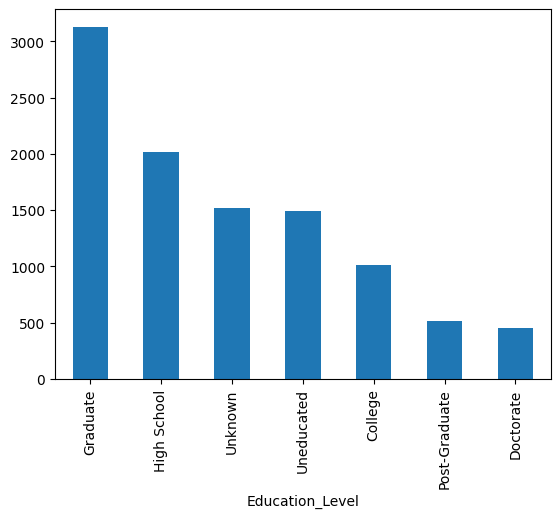

In [27]:
data['Education_Level'].value_counts().plot.bar()

- Highest Educational Qualification of maximum number of the customers is 'Graduate'.

<Axes: xlabel='Income_Category'>

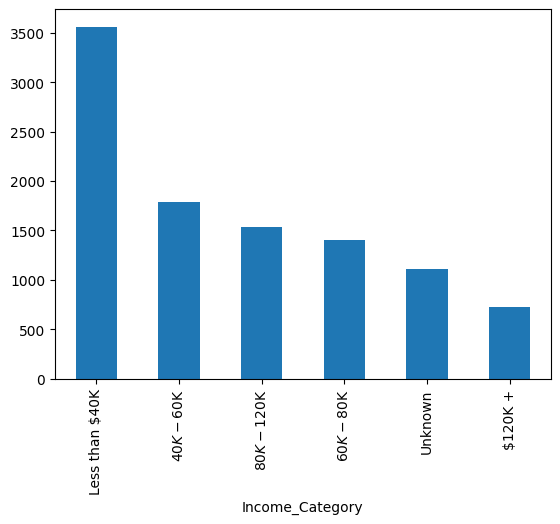

In [28]:
data['Income_Category'].value_counts().plot.bar()

- Maximum number of customers are from 'Less than $40k' income group annually.

<Axes: xlabel='Card_Category'>

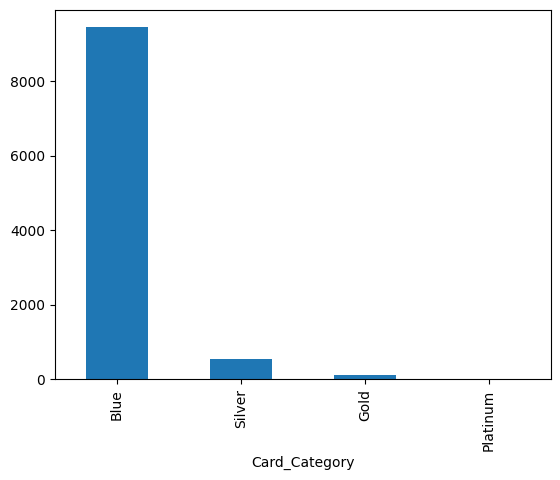

In [29]:
data['Card_Category'].value_counts().plot.bar()

- maximum number of customers have access to the 'Blue' card, whereas the least number of customers have 'Platinum' card.

# BIVARIATE ANALYSIS

In [47]:
data['Customer_Age'].corr(data['Credit_Limit'])

0.0024762273596652495

<Axes: xlabel='Customer_Age', ylabel='Credit_Limit'>

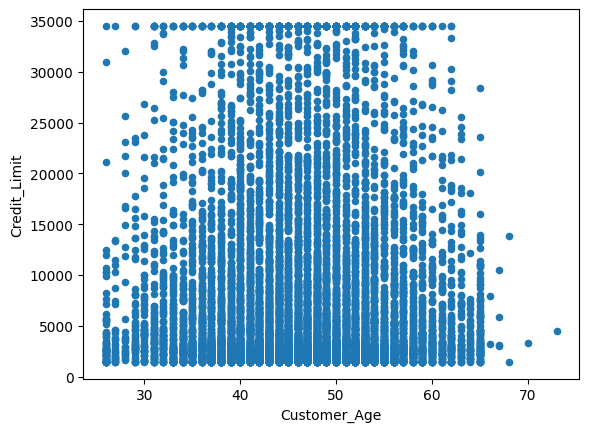

In [48]:
data.plot.scatter('Customer_Age', 'Credit_Limit')

- we can see that Customer of 40 - 50 age group has the maximum Credit Limit.

In [49]:
data['Customer_Age'].corr(data['Total_Trans_Amt'])

-0.046446490854687265

<Axes: xlabel='Customer_Age', ylabel='Total_Trans_Amt'>

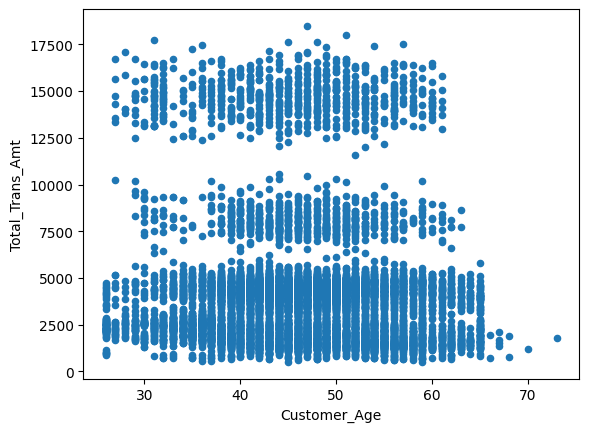

In [50]:
data.plot.scatter('Customer_Age', 'Total_Trans_Amt')

- Total Transaction Amount between 1000 to 5000 is dense, transacted mostly by 37 - 57 age group people.

In [51]:
data.groupby('Attrition_Flag')['Customer_Age'].mean()

Attrition_Flag
Attrited Customer    46.659496
Existing Customer    46.262118
Name: Customer_Age, dtype: float64

- mean age of Attrited as well as Existing customers are almost same.

In [52]:
data.groupby('Gender')['Customer_Age'].mean()

Gender
F    46.456887
M    46.178863
Name: Customer_Age, dtype: float64

- mean age of Male as well as Female customers are almost same.

<Axes: xlabel='Card_Category'>

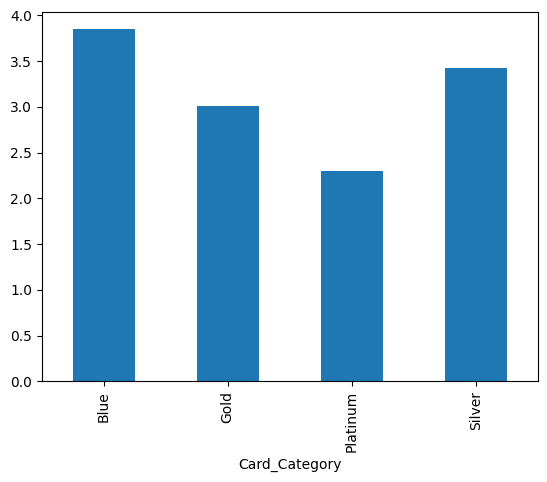

In [53]:
data.groupby('Card_Category')['Total_Relationship_Count'].mean().plot.bar()

- we can see that as the Card Category is moving as "Blue > Silver > Gold > Platinum" the number of mean products held by the customers are decreasing.

<Axes: xlabel='Gender'>

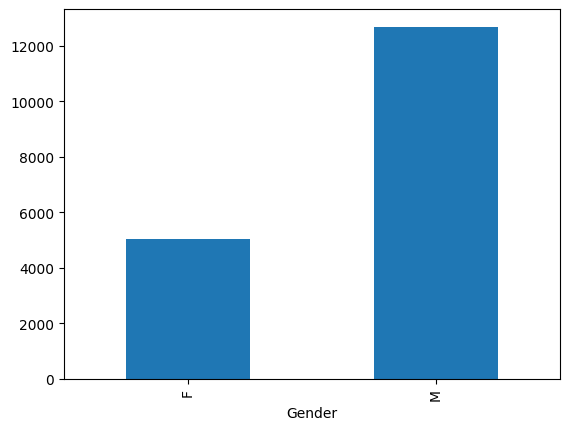

In [54]:
data.groupby('Gender')['Credit_Limit'].mean().plot.bar()

- Females have lower credit limit when compared to the males

<Axes: xlabel='Income_Category'>

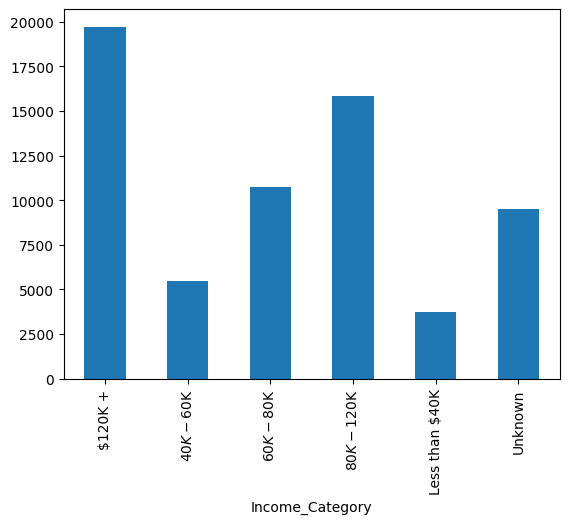

In [55]:
data.groupby('Income_Category')['Credit_Limit'].mean().plot.bar()

- As usual more income category customer('120K+ dollars') have highest credit limit & low income category customer('Less than 40K dollars') has lowest credit limit.

<Axes: xlabel='Card_Category'>

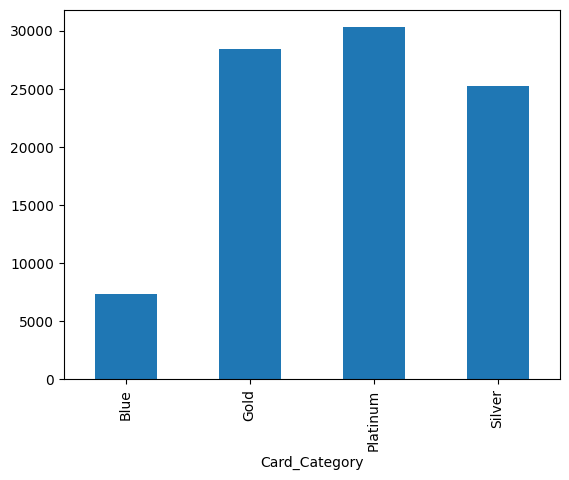

In [56]:
data.groupby('Card_Category')['Credit_Limit'].mean().plot.bar()

- Card_Category in descending order i.e. "Platinum > Gold > Silver > Blue" has the Credit limit i.e. maximum credit limit for Platinum cardholders & least credit limit for Blue cardholders.

In [57]:
pd.crosstab(data['Gender'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


Text(0, 0.5, 'Percentage')

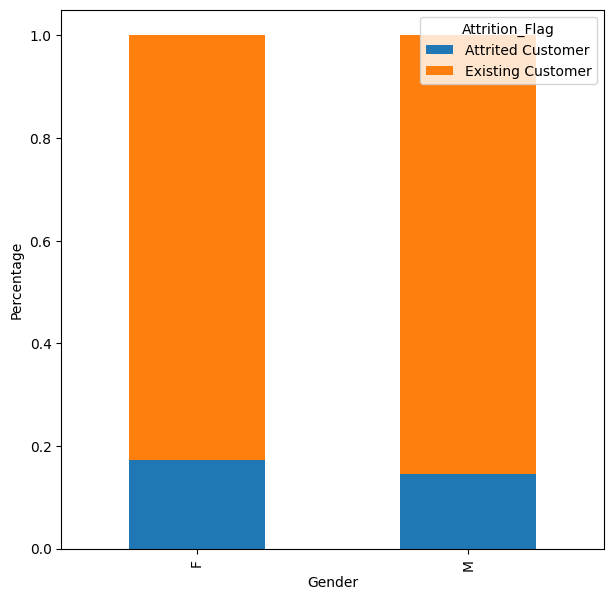

In [58]:
gen_bar = pd.crosstab(data['Gender'], data['Attrition_Flag'])
gen_bar.div(gen_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7,7))
plt.xlabel('Gender')
plt.ylabel('Percentage')

- So as we can see from the graph that Female customers have a higher attrition rate than the Male customers.

In [59]:
pd.crosstab(data['Education_Level'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


Text(0, 0.5, 'Percentage')

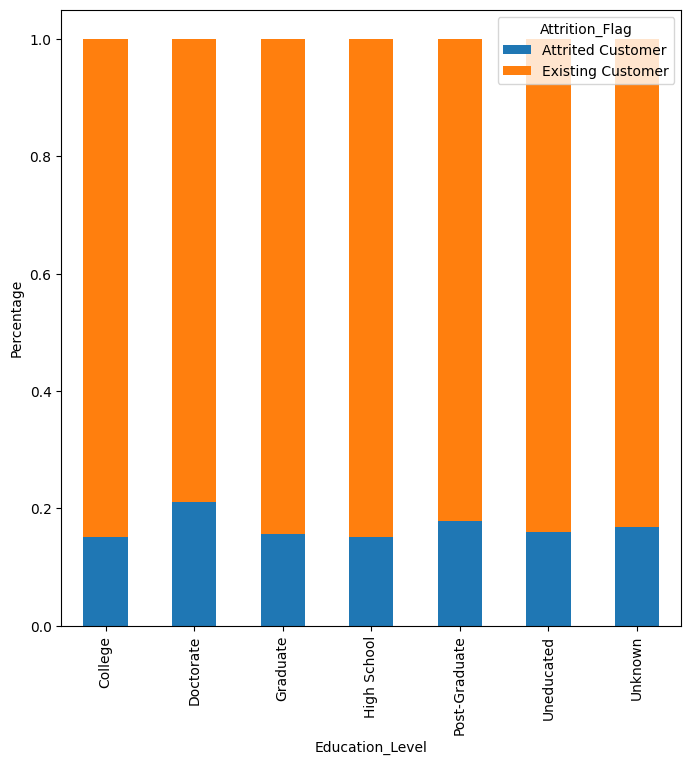

In [60]:
mar_bar = pd.crosstab(data['Education_Level'], data['Attrition_Flag'])
mar_bar.div(mar_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.xlabel('Education_Level')
plt.ylabel('Percentage')

- Customers with 'Doctorate' followed by 'Post-Graduate' Educational Qualification rate have a higher attrition rate when compared to others.

In [65]:
data['Attrition_Flag'].replace('Existing Customer', 1, inplace = True)
data['Attrition_Flag'].replace('Attrited Customer', 0, inplace = True)

- To check the correlation of our Target Variable('Attrition_Flag') we have converted their categorical value to the numerical values. As we can see correlation only between the numeric variables.

# Missing Values & Outlier Treatment

In [66]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- So, we can see that there are no missing values in our data.

<Axes: >

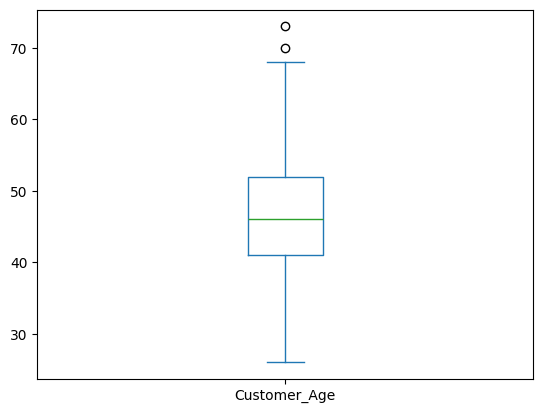

In [67]:
data['Customer_Age'].plot.box()

In [69]:
data.loc[data['Customer_Age'] > 68, 'Customer_Age'] = np.mean(data['Customer_Age'])

- removing the outliers from 'Customer_Age', as there are some outliers above 68, so we will impute it with mean 'Customer_Age'.

<Axes: >

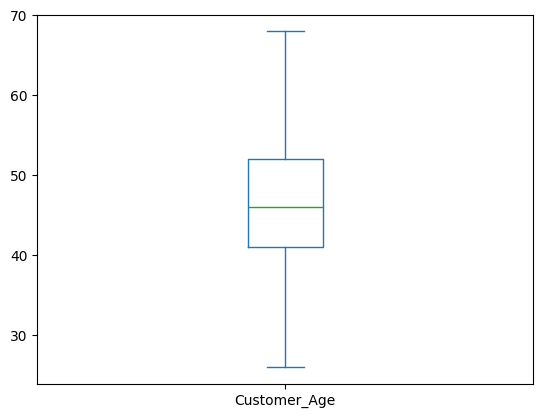

In [70]:
data['Customer_Age'].plot.box()

<Axes: xlabel='Card_Category'>

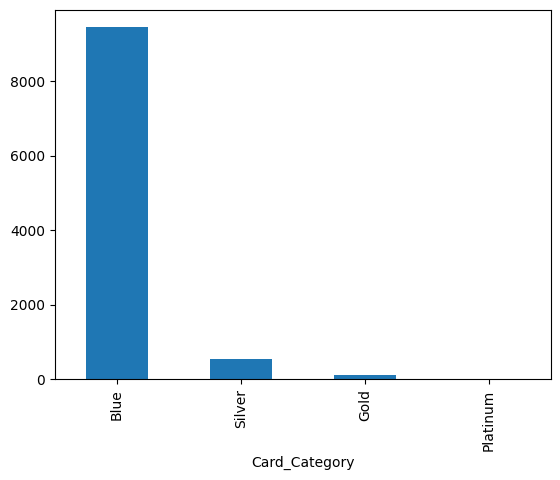

In [71]:
data['Card_Category'].value_counts().plot.bar()

- Here we can see that 'Platinum' & 'Gold' are the Outliers.

<Axes: xlabel='Card_Category'>

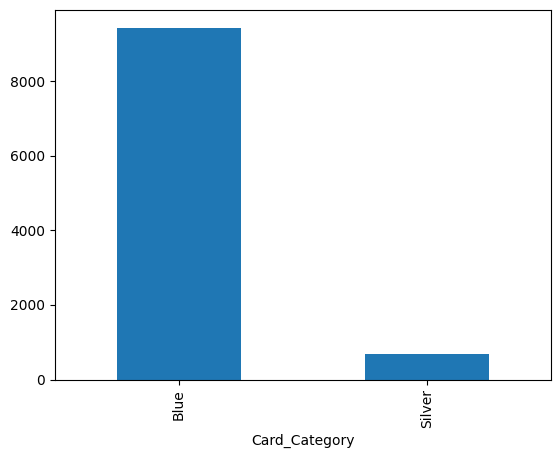

In [74]:
data['Card_Category'].value_counts().plot.bar()

- So we have imputed 'Gold' & 'Platinum' Card_Category with the 'Silver' Card_Category.

In [83]:
import warnings
warnings.filterwarnings('ignore')

- this 'warnings' library will ignore the errors.

In [78]:
from sklearn.preprocessing import LabelEncoder

- Machine Learning algorithms can only work on numbers and not on labels, so we have to convert labels in these datasets into numbers using LABEL ENCODER.

In [84]:
le_Gender = LabelEncoder()
le_Education_Level = LabelEncoder()
le_Marital_Status = LabelEncoder()
le_Income_Category = LabelEncoder()
le_Card_Category = LabelEncoder()

In [85]:
data['Gender_n'] = le_Gender.fit_transform(data['Gender'])
data['Education_Level_n'] = le_Gender.fit_transform(data['Education_Level'])
data['Marital_Status_n'] = le_Gender.fit_transform(data['Marital_Status'])
data['Income_Category_n'] = le_Gender.fit_transform(data['Income_Category'])
data['Card_Category_n'] = le_Gender.fit_transform(data['Card_Category'])

In [86]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_n,Education_Level_n,Marital_Status_n,Income_Category_n,Card_Category_n
0,768805383,1,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,1.335,1144,42,1.625,0.061,1,3,1,2,0
1,818770008,1,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,1.541,1291,33,3.714,0.105,0,2,2,4,0
2,713982108,1,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.594,1887,20,2.333,0.000,1,2,1,3,0
3,769911858,1,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,1.405,1171,20,2.333,0.760,0,3,3,4,0
4,709106358,1,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.175,816,28,2.500,0.000,1,5,1,2,0


In [87]:
data_n = data.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis = 1)

In [88]:
data_n.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_n,Education_Level_n,Marital_Status_n,Income_Category_n,Card_Category_n
0,768805383,1,45.0,3,39,5,1,3,12691.0,777,...,1.335,1144,42,1.625,0.061,1,3,1,2,0
1,818770008,1,49.0,5,44,6,1,2,8256.0,864,...,1.541,1291,33,3.714,0.105,0,2,2,4,0
2,713982108,1,51.0,3,36,4,1,0,3418.0,0,...,2.594,1887,20,2.333,0.000,1,2,1,3,0
3,769911858,1,40.0,4,34,3,4,1,3313.0,2517,...,1.405,1171,20,2.333,0.760,0,3,3,4,0
4,709106358,1,40.0,3,21,5,1,0,4716.0,0,...,2.175,816,28,2.500,0.000,1,5,1,2,0


In [ ]:
data_n = data_n.drop('CLIENTNUM', axis = 1)

In [ ]:
data_n.shape

- we have removed the 'CLIENTNUM' column before preparing our model, because Client Number is not useful for predicting our model.
- As we have done all the exploratory analysis, now it's time to build our model to predict the Customer Attrition.

# Model Building

In [89]:
train = data_n.drop('Attrition_Flag',  axis = 1)
target = data_n['Attrition_Flag']

- 'train' contains our Independent Variables.
- 'target' contains our Target Variable.
- now we will split our training and testing data into 81 : 19.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.19, random_state = 20)

- as our data is ready now, we will built Logistic Regression model, as our target variable is Discrete in nature.

LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logreg = LogisticRegression()

In [94]:
logreg.fit(x_train, y_train)

LogisticRegression()

- fitting our training data into the model.

In [95]:
prediction = logreg.predict(x_test)

- doing 'prediction' on the testing dataset.
- now we will evaluate, that how accurate our model  is, by computing the 'accuracy score' of the test dataset.

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, prediction)

0.852987012987013

- we got an accuracy of 85% on our test dataset. Logistic Regression has a Linear Decision Boundary.
- What if our data have non - linearity?
- So, we need a model which can capture this non - linearity.
- So, now we will try to fit our data on Decision Tree algorithm, to check if we can get better accuracy with it.

DECISION TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
clf = DecisionTreeClassifier(random_state = 20)

In [100]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=20)

- fitting our training data into the model.

In [101]:
prediction_clf = clf.predict(x_test)

- doing 'prediction' on the testing dataset.
- now we will evaluate how accurate our model is, by computing the 'accuracy score' of the test dataset.

In [102]:
accuracy_score(y_test, prediction_clf)

0.9335064935064935

- So, we got an accuracy of 93% i.e. more than accuracy of the Logistic Regression model.

RANDOM FOREST

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [15]:
import pandas as pd

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Make sure the target variable is numeric
y = pd.factorize(y)[0]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=20)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20)
rf_classifier.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 1.0000
